Pseudo-labeling

In [22]:
#textblob
!pip install textblob



   ---------------------------------------- 0.0/624.3 kB ? eta -:--:--
   ---------------------------------------- 624.3/624.3 kB 3.3 MB/s eta 0:00:00


In [23]:
!python -m textblob.download_corpora


Finished.


[nltk_data] Downloading package brown to
[nltk_data]     C:\Users\Yourisha\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\brown.zip.
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Yourisha\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Yourisha\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     C:\Users\Yourisha\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger_eng.zip.
[nltk_data] Downloading package conll2000 to
[nltk_data]     C:\Users\Yourisha\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\conll2000.zip.
[nltk_data] Downloading package movie_reviews to
[nltk_data]     C:\Users\Yourisha\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\movie_reviews.zip.


In [24]:
from textblob import TextBlob
import pandas as pd
df = pd.read_csv("Data\merged_noDuplicate.csv")
df

,title,snippet,published_date,link,authors,source
0,Trump limits tariffs on most nations for 90 da...,"Facing a global market meltdown, President Don...",2025-04-09T07:00:00.000Z,https://apnews.com/article/trump-tariffs-stock...,Josh Boak,AP News
1,Trump says China tariffs will ‘come down subst...,US President Donald Trump has signaled a major...,2025-04-22T07:00:00.000Z,https://www.cnn.com/2025/04/22/business/trump-...,Alejandra Jaramillo,CNN
2,U.S. and China begin talks amid tensions over ...,The meetings between top U.S. and Chinese offi...,2025-05-10T17:13:00.000Z,https://www.npr.org/2025/05/10/nx-s1-5394399/u...,Willem Marx,NPR
3,Trump tariffs live updates: US won't drop Chin...,Trump tariffs live updates: US won't drop Chin...,2025-04-21T15:42:41.000Z,https://abcnews.go.com/Politics/live-updates/t...,"Alexandra Hutzler, Ivan Pereira, William Mansell",ABC News
4,Trump favors huge new tariffs. How do they work?,Former President Donald Trump has proposed a 6...,2024-09-27T07:00:00.000Z,https://www.pbs.org/newshour/economy/trump-fav...,Paul Wiseman,PBS
...,...,...,...,...,...,...
746,Canada will respond to Trump tariffs 'with pur...,A new universal 10% tariff on US imports will ...,2025-04-03T07:00:00.000Z,https://www.bbc.com/news/articles/cdde0r6eqy5o,Nadine Yousif,BBC
747,Trump threatens to end pharmaceuticals tariff ...,"The US president vows ""major"" tariffs on impor...",2025-04-09T07:00:00.000Z,https://www.bbc.com/news/articles/cedyylj1v32o,Rachel Hagan,BBC
748,Why is Trump imposing tariffs and which countr...,Trump is tackling large trade deficits. But tr...,2025-02-11T08:00:00.000Z,https://www.theguardian.com/us-news/2025/feb/1...,"Lucy Swan, Richard Partington, Ashley Kirk",The Guardian
749,Trump says EU tariffs will ‘definitely happen’...,Trump says EU tariffs will 'definitely happen'...,2025-02-02T08:00:00.000Z,https://www.theguardian.com/us-news/2025/feb/0...,NaN,The Guardian


In [25]:
#apply textblob for polarity
df['text'] = df['title'].fillna('') + '. ' + df['snippet'].fillna('')
df['polarity'] = df['text'].apply(lambda x: TextBlob(x).sentiment.polarity)
def get_sentiment(score):
    if score > 0.1:
        return 'positive'
    elif score < -0.1:
        return 'negative'
    else:
        return 'neutral'

df['Sentiment'] = df['polarity'].apply(get_sentiment)
df

,title,snippet,published_date,link,authors,source,text,polarity,Sentiment
0,Trump limits tariffs on most nations for 90 da...,"Facing a global market meltdown, President Don...",2025-04-09T07:00:00.000Z,https://apnews.com/article/trump-tariffs-stock...,Josh Boak,AP News,Trump limits tariffs on most nations for 90 da...,0.175000,positive
1,Trump says China tariffs will ‘come down subst...,US President Donald Trump has signaled a major...,2025-04-22T07:00:00.000Z,https://www.cnn.com/2025/04/22/business/trump-...,Alejandra Jaramillo,CNN,Trump says China tariffs will ‘come down subst...,-0.014769,neutral
2,U.S. and China begin talks amid tensions over ...,The meetings between top U.S. and Chinese offi...,2025-05-10T17:13:00.000Z,https://www.npr.org/2025/05/10/nx-s1-5394399/u...,Willem Marx,NPR,U.S. and China begin talks amid tensions over ...,0.187500,positive
3,Trump tariffs live updates: US won't drop Chin...,Trump tariffs live updates: US won't drop Chin...,2025-04-21T15:42:41.000Z,https://abcnews.go.com/Politics/live-updates/t...,"Alexandra Hutzler, Ivan Pereira, William Mansell",ABC News,Trump tariffs live updates: US won't drop Chin...,0.136364,positive
4,Trump favors huge new tariffs. How do they work?,Former President Donald Trump has proposed a 6...,2024-09-27T07:00:00.000Z,https://www.pbs.org/newshour/economy/trump-fav...,Paul Wiseman,PBS,Trump favors huge new tariffs. How do they wor...,0.178788,positive
...,...,...,...,...,...,...,...,...,...
746,Canada will respond to Trump tariffs 'with pur...,A new universal 10% tariff on US imports will ...,2025-04-03T07:00:00.000Z,https://www.bbc.com/news/articles/cdde0r6eqy5o,Nadine Yousif,BBC,Canada will respond to Trump tariffs 'with pur...,0.002841,neutral
747,Trump threatens to end pharmaceuticals tariff ...,"The US president vows ""major"" tariffs on impor...",2025-04-09T07:00:00.000Z,https://www.bbc.com/news/articles/cedyylj1v32o,Rachel Hagan,BBC,Trump threatens to end pharmaceuticals tariff ...,0.062500,neutral
748,Why is Trump imposing tariffs and which countr...,Trump is tackling large trade deficits. But tr...,2025-02-11T08:00:00.000Z,https://www.theguardian.com/us-news/2025/feb/1...,"Lucy Swan, Richard Partington, Ashley Kirk",The Guardian,Why is Trump imposing tariffs and which countr...,0.214286,positive
749,Trump says EU tariffs will ‘definitely happen’...,Trump says EU tariffs will 'definitely happen'...,2025-02-02T08:00:00.000Z,https://www.theguardian.com/us-news/2025/feb/0...,NaN,The Guardian,Trump says EU tariffs will ‘definitely happen’...,0.000000,neutral


In [26]:
df['Sentiment'].value_counts()

Sentiment
neutral     419
positive    254
negative     78
Name: count, dtype: int64

In [30]:
from wordcloud import WordCloud
WordCloud().generate(" ".join(df['title']))

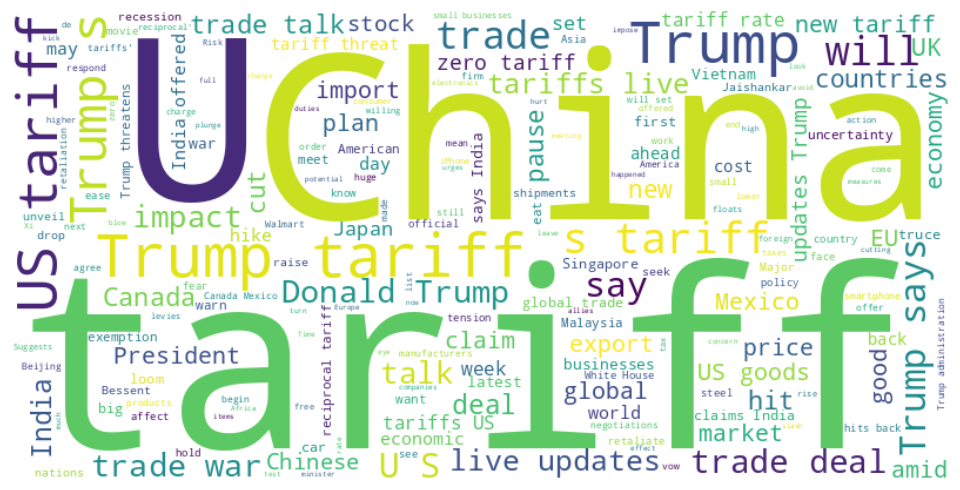

In [31]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all titles into one string
text = " ".join(df['title'].dropna())

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the image
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.tight_layout()
plt.show()


In [29]:
!pip install wordcloud